# Thông tin sinh viên

## -  Họ tên: Trần Nguyên Huân
## - Mã số sinh viên: 21127050
## - Lớp: 21CLC03

# <center>Đồ án Linear Regression</center>

 ## <font face="gotham" color="purple">Bài toán bình phương tối thiểu OLS (Ordinary Least square)</font>
 ---

Xét ma trận **A** có kích thước $m x n$ $(m > n)$ và vector **b** có
kích thước *m*. Bình phương tối tiểu **\$\hat{r}\$** của **A** và **b**
trên giá trị **\$x\$** được tính như sau:
**\$\$\hat{r} = \|\|Ax - b\|\|^{2}\$\$** **\$\$\hat{x} =
(A^TA)^{-1}A^Tb\$\$**

 ## <font face="gotham" color="purple">Mô hình hồi quy tuyến tính (Linear regression model)</font>
 ---

Nghiệm **\$\hat{x}\$** của phương trình hồi quy tuyến tính **Ax = b**
được tính như sau: **\$\$\hat{x} = (A^{T}A)^{-1}A^{T}b = A^{+}b\$\$**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('wine.csv')

 ## <font face="gotham" color="purple">Thông tin chi tiết về bộ dữ liệu wine.csv</font>
 ---

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   "quality"               1199 non-null   int64  
 1   fixed acidity           1199 non-null   float64
 2   "volatile acidity"      1199 non-null   float64
 3   "citric acid"           1199 non-null   float64
 4   "residual sugar"        1199 non-null   float64
 5   "chlorides"             1199 non-null   float64
 6   "free sulfur dioxide"   1199 non-null   float64
 7   "total sulfur dioxide"  1199 non-null   int64  
 8   "density"               1199 non-null   float64
 9   "pH"                    1199 non-null   float64
 10  "sulphates"             1199 non-null   float64
 11  "alcohol"               1199 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 112.5 KB


In [71]:
df

,"""quality""",fixed acidity,"""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol"""
0,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
1,5,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8
2,5,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8
3,6,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,6,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5
1195,6,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5
1196,6,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5
1197,6,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8


 ## <font face="gotham" color="purple">Các mô hình trong file `Lab 5_Toan UDTK_Linear regression.html` (được cung cấp trên moddle)</font>
 ---

### 1) Mô hình tuyến tính $Y=\theta_1+\theta_2X\$

In [106]:
def getAb(x, y):
    col1 = np.ones(len(x))
    colx = np.transpose(np.array(x))
    A = np.transpose(np.vstack((col1, colx)))
    b = np.array(y).reshape(len(y), 1)
    return A, b

def model(x, theta):
    return theta[0] + theta[1]*x 

### 2) Mô hình $Y=\theta_1+\theta_2X^2$

In [73]:
def getAb(x, y):
    col1 = np.ones(len(x))
    colx = np.transpose(np.array(x))
    A = np.transpose(np.vstack((col1, colx**2)))
    b = np.array(y).reshape(len(y), 1)
    return A, b

def model(x, theta):
    return theta[0] + theta[1]*x**2

### 3) Mô hình $Y=\theta_1+\theta_2X+\theta_3X^2$

In [74]:
def getAb(x, y):
    col1 = np.ones(len(x))
    colx = np.transpose(np.array(x))
    A = np.transpose(np.vstack((col1, colx, colx**2)))
    b = np.array(y).reshape(len(y), 1)
    return A, b

def model(x, theta):
    return theta[0] + theta[1]*x + theta[2]*x**2

### 4) Mô hình tuyến tính - log: \$Y=\theta_1+\theta_2lnX$

In [75]:
def getAb(x, y):
    col1 = np.ones(len(x))
    colx = np.transpose(np.array(x))
    A = np.transpose(np.vstack((col1, np.log(colx))))
    b = np.array(y).reshape(len(y), 1)
    return A, b

def model(x, theta):
    return theta[0] + theta[1]*np.log(x)

# Drop rows with any zero values in the DataFrame
df = df[(df != 0).all(1)]

### 5) Mô hình log - tuyến tính: $lnY=\theta_1+\theta_2X\$

In [104]:
def getAb(x, y):
    col1 = np.ones(len(x))
    colx = np.transpose(np.array(x))
    A = np.transpose(np.vstack((col1, colx)))
    b = np.log(np.array(y).reshape(len(y), 1))
    return A, b

def model(x, theta):
    return np.exp(theta[0] + theta[1]*x)

### 6) Mô hình log - log: $lnY=\theta_1+\theta_2lnX$

In [77]:
def getAb(x, y):
    col1 = np.ones(len(x))
    colx = np.transpose(np.array(x))
    A = np.transpose(np.vstack((col1, np.log(colx))))
    b = np.log(np.array(y).reshape(len(y), 1))
    return A, b

def model(x, theta):
    return np.exp(theta[0] + theta[1]*np.log(x))

# Xóa các dòng có tổn tại giá trị bằng 0 trong dataframe để tránh lỗi với log(x)
df = df[(df != 0).all(1)]

***Lưu ý: Với mô hình 4 và 6 bên trên, nếu muốn áp dụng mô hình đó cho bộ dữ liệu ta cần xóa các dòng có tồn tại value = 0 vì điều kiện của log(x) là x > 0***

 ## <font face="gotham" color="purple">Các hàm phụ phục vụ xây dựng mô hình và hiển thị biểu đồ</font>
 ---

In [78]:
# Ham tinh theta
def theta(A, b):
    theta = np.linalg.inv(np.matmul(np.transpose(A), A)) @ np.matmul(np.transpose(A), b)
    return theta

# Ham tinh norm
def norm(A, b, theta):
    return np.linalg.norm(A @ theta - b)

# Ham hien thi bieu do giua mo hinh va gia tri thuc
def show(xs, ys, theta):
    plt.plot(xs, ys, "o", color="green")
    ts = np.linspace(np.min(xs), np.max(xs), 50)
    yts = [model(t, theta) for t in ts]
    plt.plot(ts, yts, color="blue")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Linear Regression")
    plt.legend(["Data points", "Line of regression"])
    plt.grid(True)
    plt.show()
    
# Ham hien thi bieu do tuong quan giua tung dac trung voi "quality"
def plot_data(df):
    ys = df.iloc[:, 0].to_numpy()
    for i in range(1, 12):
        xs = df.iloc[:, i].to_numpy()
        
        # Sử dụng Seaborn để vẽ biểu đồ và đặt tên cho biểu đồ
        xs = df.iloc[:, i].to_numpy()
        plt.plot(xs, ys, "o", color="blue")
        plt.title(f"Biểu đồ tương quan giữa {df.columns[i]} và {df.columns[0]}")
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[0])
        plt.show()

 ## <font face="gotham" color="purple">a. Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp</font>
 ---

 ### <font face="gotham" color="blue">Đầu tiên cần phải trực quan mối quan hệ của từng đặc trưng với "quality"</font>

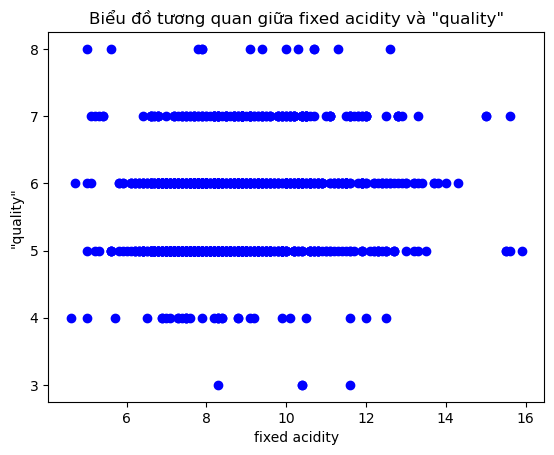

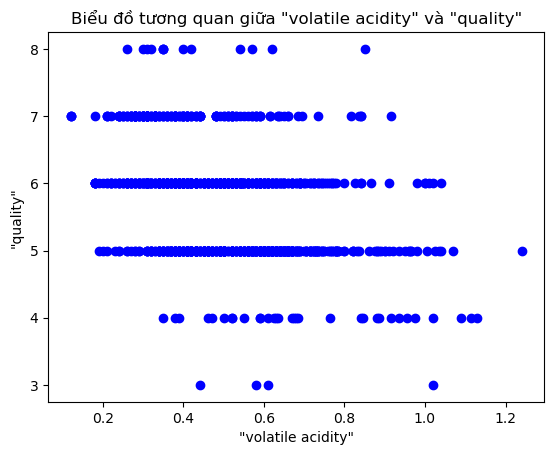

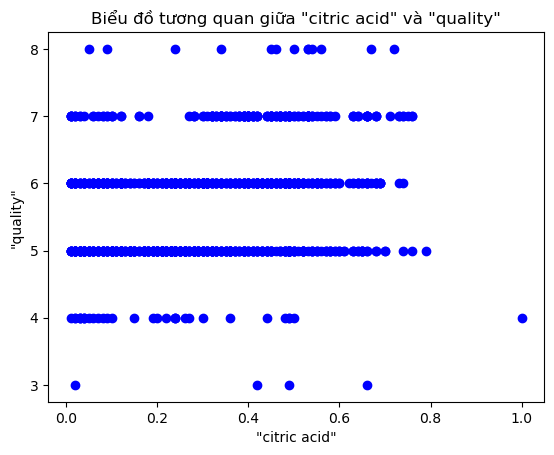

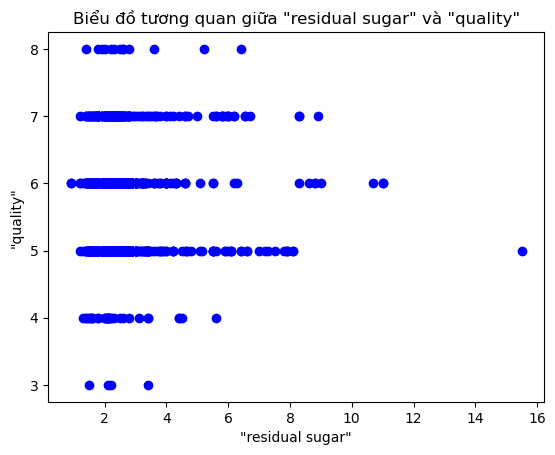

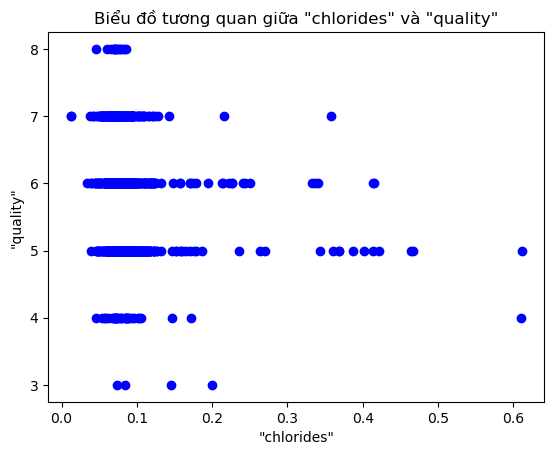

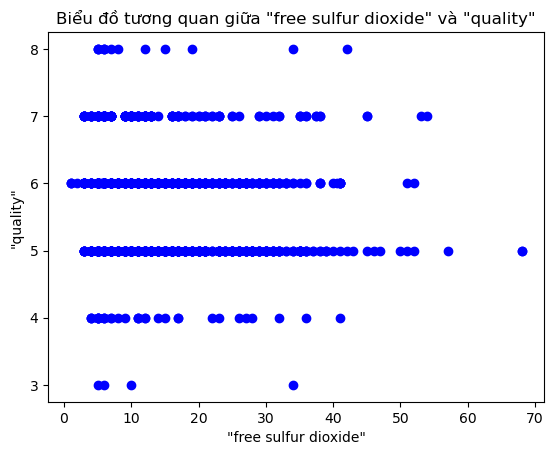

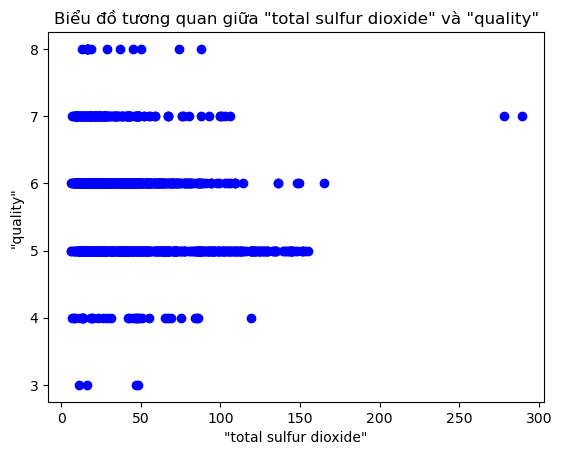

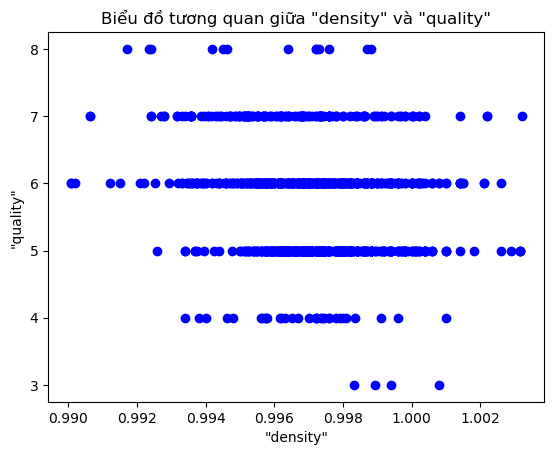

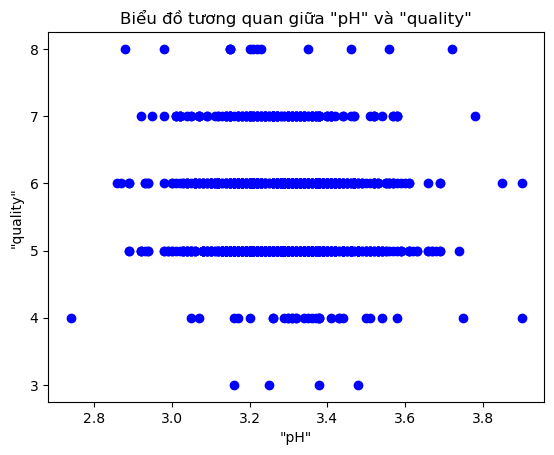

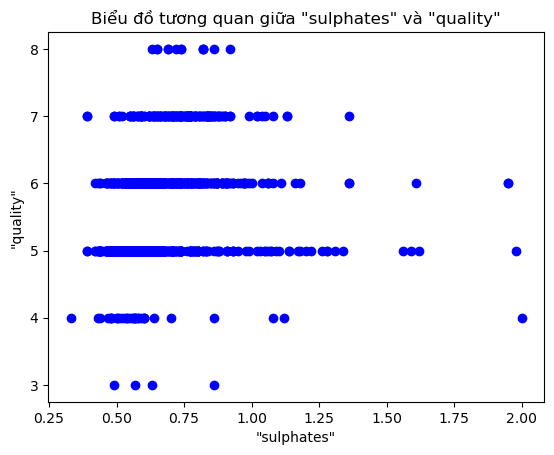

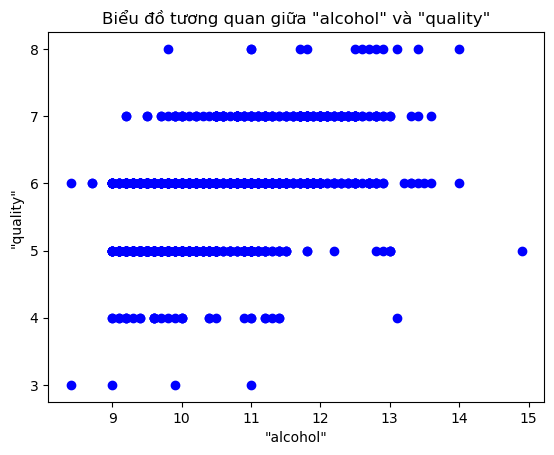

In [81]:
plot_data(df)

***Nhìn vào biểu đồ mối quan hệ của từng đặc trưng với "quality" thì em thấy không có mối liên hệ gì mật thiết với nhau. Các dữ liệu thường tập trung là một đường nằm ngang ở một giá trị y nhất định***

 ### <font face="gotham" color="blue">Áp dụng mô hình 1 cho câu a</font>

In [87]:
# Cau a
def fit_linear_model_all_features():
    x = (df.iloc[:, 1:12]).to_numpy()
    y = (df.iloc[:, 0]).to_numpy()
    A, b = getAb(x, y)
    print(theta(A, b))
    print(norm(A, b, theta(A, b)))


In [107]:
fit_linear_model_all_features()

[[ 4.29171624e+01]
 [ 4.75247530e-02]
 [-1.06874258e+00]
 [-2.68710829e-01]
 [ 3.49742662e-02]
 [-1.59729560e+00]
 [ 3.48788138e-03]
 [-3.79835506e-03]
 [-3.94690810e+01]
 [-2.45575908e-01]
 [ 7.73840794e-01]
 [ 2.69377496e-01]]
22.094716807791663


 ## <font face="gotham" color="purple">b. Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất</font>
 ---

In [102]:
# Cau b
def find_best_feature():
    y = df.iloc[:, 0].to_numpy()

    for i in range(1, 12):
        x = df.iloc[:, i].to_numpy()
        print(f"Đặc trưng {df.columns[i]}")
        print("x:", x)

        A, b = getAb(x, y)
        current_norm = norm(A, b, theta(A, b))
        print(f"Norm cho đặc trưng {df.columns[i]}: {current_norm}\n")

        if i == 1 or current_norm < temp:
            temp = current_norm
            col = x
            index = i
    print(f"Đặc trưng được chọn có loss value nhỏ nhất là: {df.columns[index]}")
    print("x:", col)
    print(f"Giá trị norm nhỏ nhất: {temp}")

    show(col, y, theta(A, b))  # A và b lấy được sau vòng lặp (tức là A,b tương ứng với giá trị norm nhỏ nhất)



Đặc trưng fixed acidity
x: [7.4 7.8 7.8 ... 7.9 7.7 7.7]
[[5.08063442]
 [0.06771801]]
Norm cho đặc trưng fixed acidity: 27.708776606551698

Đặc trưng "volatile acidity"
x: [0.7  0.88 0.76 ... 0.58 0.57 0.26]
[[ 6.55564501]
 [-1.71617885]]
Norm cho đặc trưng "volatile acidity": 25.921046257502894

Đặc trưng "citric acid"
x: [0.   0.   0.04 ... 0.23 0.21 0.26]
[[5.38925587]
 [0.939022  ]]
Norm cho đặc trưng "citric acid": 27.28232609600131

Đặc trưng "residual sugar"
x: [1.9 2.6 2.3 ... 2.3 1.5 2. ]
[[5.58423067]
 [0.03138657]]
Norm cho đặc trưng "residual sugar": 27.988047661119886

Đặc trưng "chlorides"
x: [0.076 0.098 0.092 ... 0.076 0.069 0.052]
[[ 5.85091609]
 [-2.08584874]]
Norm cho đặc trưng "chlorides": 27.80382915794736

Đặc trưng "free sulfur dioxide"
x: [11. 25. 15. ... 23.  4. 19.]
[[ 5.75533073]
 [-0.00594449]]
Norm cho đặc trưng "free sulfur dioxide": 27.942875473161074

Đặc trưng "total sulfur dioxide"
x: [34 67 54 ... 94  9 77]
[[ 5.91838860e+00]
 [-5.41053706e-03]]
Norm 

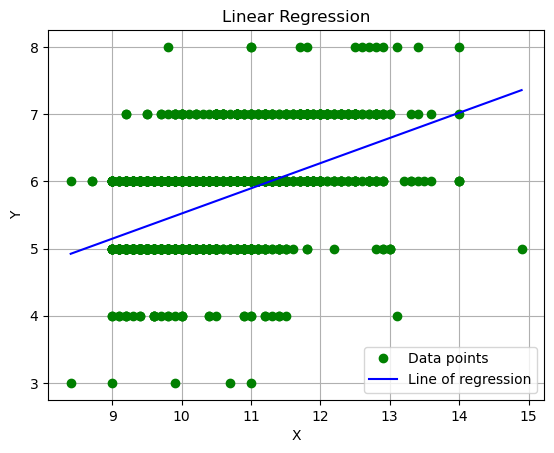

In [103]:
find_best_feature()

***Dựa vào kết quả trên ta có thể rút ra được mô hình dựa trên thuộc tính `alcohol` có Loss value thấp nhất, nên đây là thuộc tính đáng tin cậy nhất.***

 ## <font face="gotham" color="purple">c. Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất</font>
 ---

### Mô hình log - tuyến tính: $lnY=\theta_1 + \theta_2X + \theta_3X^2$

In [94]:
#   Cau c
# Mo hinh tuyen tinh Sigmoid : ln(y) = theta1 + theta2 * x + theta3 * x^2
def self_getAb(x, y):
    col1 = np.ones(len(x))
    colx = np.transpose(np.array(x))
    A = np.transpose(np.vstack((col1, colx, colx**2)))
    b = np.log(np.array(y).reshape(len(y), 1))
    return A, b

In [95]:
def fit_self_linear_model():
    x = (df.iloc[:, 1:12]).to_numpy()
    y = (df.iloc[:, 0]).to_numpy()
    A, b = self_getAb(x, y)
    print(theta(A, b))
    print(norm(A, b, theta(A, b)))


In [96]:
fit_self_linear_model()

[[ 1.05275673e+03]
 [ 4.30646541e-02]
 [-1.48274909e-01]
 [-1.96426206e-01]
 [ 6.41676961e-03]
 [-1.82033265e-01]
 [ 2.44981213e-03]
 [-1.02468705e-03]
 [-2.10571176e+03]
 [ 7.39181200e-01]
 [ 5.67238965e-01]
 [ 1.18251001e-01]
 [-2.09046837e-03]
 [-3.81179820e-02]
 [ 2.21972442e-01]
 [-2.33962266e-04]
 [-2.14536875e-01]
 [-4.02896710e-05]
 [ 2.77800001e-06]
 [ 1.05239224e+03]
 [-1.23886713e-01]
 [-2.37651321e-01]
 [-3.49429660e-03]]
3.9020979933778106


 ## <font face="gotham" color="purple">Mô tả ý tưởng thực hiện và mô tả các hàm</font>
 ---

 ### <font face="gotham" color="blue">Các hàm phục vụ xây dựng mô hình</font>

Để thuận tiện xây dựng mô hình, hàm `getAb(x,y)` được viết.

### Input
- x, y lần lượt là vector dữ liệu của 2 biến $X,Y$ ban đầu.
### Output
- hàm trả về ma trận dữ liệu $A$ đã bổ sung thêm cột số 1 và ma trận cột $b$ dùng để tìm các hệ số cho mô hình hồi quy.

**Áp dụng Mô hình tuyến tính $Y=\theta_1+\theta_2X\$ với câu a, do dữ liệu trong file csv cho 11 cột là một ma trận nên ở đây sẽ dùng hàm `numpy.vstack` để kết hợp ma trận cột 1 và ma trận đã lấy được.**

***Lưu ý:  Trước khi dùng vstack ta phải chuyển vị ma trận lấy được từ data trong file .csv, sau đó
mới thêm ma trận cột 1 để từ size (1199,11) thành (1199,12).***

Ngoài ra còn các hàm:
- Hàm `theta`: dùng để tính nghiệm $\hat{x}$ của phương trình hồi quy $Ax = b$
- Hàm `norm`: dùng để tính $\|\|Ax - b\||\$
- Hàm `show(xs, ys, theta)`: được sử dụng để hiển thị biểu đồ của mô hình hồi quy tuyến tính trên dữ liệu đã được huấn luyện. Biểu đồ này bao gồm các điểm dữ liệu được biểu diễn bằng các dấu "o" màu xanh, cùng với đường thẳng biểu diễn mô hình hồi quy tuyến tính dự đoán trên dữ liệu đó, được biểu diễn bằng đường màu đỏ.
- Hàm `plot_data(df)`: trực quan mối tương quan của từng đặc trưng với "quality". Với mỗi đặc trưng sẽ có 1 đồ thị tương ứng.

 ### <font face="gotham" color="blue">Hàm `fit_linear_model_all_features()` ở câu a</font>

Hàm `fit_linear_model_all_features()` ở câu a được sử dụng để xây dựng mô hình hồi quy tuyến tính trên tất cả các tính năng (features) trong dữ liệu và đánh giá hiệu suất của mô hình dựa trên hàm mất mát (loss function).
- Đối với điều kiện lấy hết cả 11 cột dữ liệu thì ta sẽ dùng **.iloc** để lấy dữ liệu từ cột **fixed acidity** đến cột **alcohol** và chuyển về numpy để gán cho x.
- Tương tự với y, với cột quality. Gọi hàm getAb và in ra theta và norm.

 ### <font face="gotham" color="blue">Hàm `find_best_feature()` ở câu b</font>

Hàm `find_best_feature()` được sử dụng để tìm đặc trưng (feature) tốt nhất trong việc xây dựng mô hình hồi quy tuyến tính trên dữ liệu. Đặc trưng tốt nhất là đặc trưng mà khi sử dụng để huấn luyện mô hình, sẽ cho ra giá trị hàm mất mát (loss function) nhỏ nhất, tức là mô hình có khả năng dự đoán tốt nhất trên dữ liệu.
-  Đối với điều kiện dùng lần lượt từng đặc trưng để đánh giá quality, ta sẽ dùng vòng lặp để chọn ra từng đặc trưng và gán biến tạm thời với số norm nhỏ nhất, sau đó in x, norm và cuối cùng, sử dụng hàm `show(col, y, theta(A, b))` để hiển thị biểu đồ của mô hình hồi quy tuyến tính trên dữ liệu đặc trưng tốt nhất.

 ### <font face="gotham" color="blue">Áp dụng mô hình log - tuyến tính: $lnY=\theta_1 + \theta_2X + \theta_3X^2$ cho câu c (áp dụng cho 11 đặc trưng)</font>

Hàm `self_getAb(x,y)` có xây dựng tương tự như hàm `getAb(x,y)` ở bên trên chỉ khác công thức sử dụng. Mô hình $lnY=\theta_1 + \theta_2X + \theta_3X^2$ cho kết quả loss value khá tốt (tốt hơn 6 mô hình được đề cập bên trên).